In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Kalash Srivastava\Internship_Elevate\Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df[["Age","Cabin","Embarked"]].value_counts()

Age    Cabin    Embarked
24.00  B35      C           2
36.00  B96 B98  S           2
       E25      S           2
0.92   C22 C26  S           1
2.00   G6       S           1
                           ..
65.00  B30      C           1
       E38      S           1
70.00  B22      S           1
71.00  A5       C           1
80.00  A23      S           1
Name: count, Length: 180, dtype: int64

So here we can see that we have some null values in the age and cabin column of the dataset.
The option we have is either to drop the column,take the average mean, median or mode (most repeated number in that column)
but we cant just cant drop the column because it may affect the model prediction or we may drop the import feature for model'sprediction.    

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [9]:
imputer.fit(df[["Age","Cabin","Embarked"]])
df[["Age","Cabin","Embarked"]] = imputer.transform(df[["Age","Cabin","Embarked"]])

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: object

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Deck'] = df['Cabin'].str[0]

In [14]:
df.drop(columns=["Name","Age","Ticket","Cabin"],axis=1,inplace=True)

In [15]:
df[['Title','Deck']]

,Title,Deck
0,Mr,B
1,Mrs,C
2,Miss,B
3,Mrs,C
4,Mr,B
...,...,...
886,Rev,B
887,Miss,B
888,Miss,B
889,Mr,C


In [16]:
cat_data = df.select_dtypes(include="O")
num_data = df.select_dtypes(exclude="O")

In [17]:
cat_data.columns.tolist()

['Sex', 'Embarked', 'Title', 'Deck']

In [18]:
num_data.columns.tolist()

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

I have these many object type columns or categorical data now i want to preprcoess it and convert it to numerical form and megre it with the dataset.For convergence i'll use OneHotEncoder to conver the categorical values into numerical one.

In [19]:
cat_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
cat_data["Sex"] = cat_data["Sex"].map({"male":0,"female":1})

In [21]:
cat_data["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

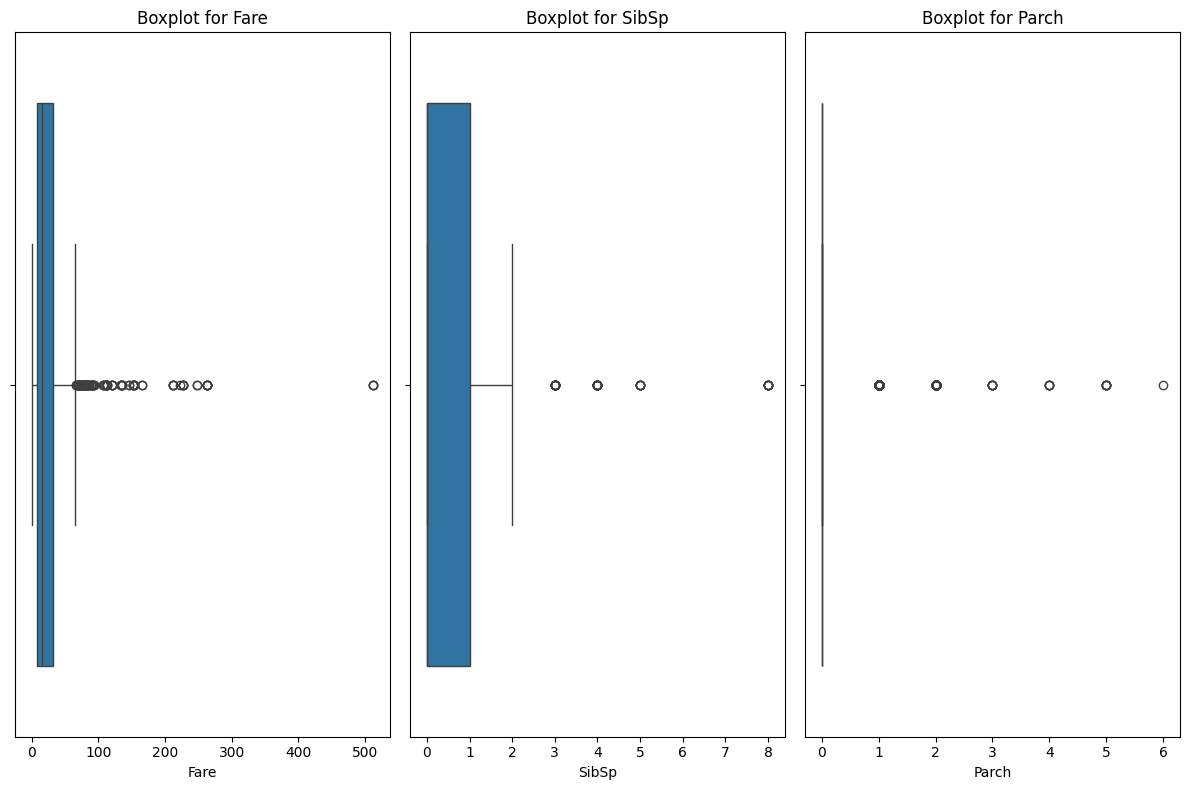

In [23]:
numeric_columns = ['Fare', 'SibSp', 'Parch']  # List only actual columns present

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(cat_data)
cat_data_col = encoder.get_feature_names_out(cat_data.columns)

In [ ]:
dataset = pd.DataFrame(encoded_data,columns=cat_data_col)

In [ ]:
dataset

,Sex_1,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Title_Ms,Title_Rev,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new = pd.concat([num_data,dataset],axis=1)

In [ ]:
df_new.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S,Title_Col,...,Title_Ms,Title_Rev,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,3,1,0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,0,0,7.9250,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,1,0,53.1000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
SibSp             0
Parch             0
Fare              0
Sex_1             0
Embarked_Q        0
Embarked_S        0
Title_Col         0
Title_Countess    0
Title_Don         0
Title_Dr          0
Title_Jonkheer    0
Title_Lady        0
Title_Major       0
Title_Master      0
Title_Miss        0
Title_Mlle        0
Title_Mme         0
Title_Mr          0
Title_Mrs         0
Title_Ms          0
Title_Rev         0
Title_Sir         0
Deck_B            0
Deck_C            0
Deck_D            0
Deck_E            0
Deck_F            0
Deck_G            0
Deck_T            0
dtype: int64

In [ ]:
df_new.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
SibSp               int64
Parch               int64
Fare              float64
Sex_1             float64
Embarked_Q        float64
Embarked_S        float64
Title_Col         float64
Title_Countess    float64
Title_Don         float64
Title_Dr          float64
Title_Jonkheer    float64
Title_Lady        float64
Title_Major       float64
Title_Master      float64
Title_Miss        float64
Title_Mlle        float64
Title_Mme         float64
Title_Mr          float64
Title_Mrs         float64
Title_Ms          float64
Title_Rev         float64
Title_Sir         float64
Deck_B            float64
Deck_C            float64
Deck_D            float64
Deck_E            float64
Deck_F            float64
Deck_G            float64
Deck_T            float64
dtype: object

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Deck'],
      dtype='object')

In [ ]:
df_new.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_1',
 'Embarked_Q',
 'Embarked_S',
 'Title_Col',
 'Title_Countess',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T']

In [ ]:
X = df_new.drop(["Survived"],axis=1)
y = df_new["Survived"]

In [ ]:
X

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S,Title_Col,Title_Countess,...,Title_Ms,Title_Rev,Title_Sir,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,3,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,3,0,0,7.9250,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,0,53.1000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,3,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,888,1,0,0,30.0000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,889,3,1,2,23.4500,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,890,1,0,0,30.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.73010796,  0.82737724,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [-1.72622007, -1.56610693,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [-1.72233219,  0.82737724, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008],
       ...,
       [ 1.72233219,  0.82737724,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [ 1.72622007, -1.56610693, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008],
       [ 1.73010796,  0.82737724, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008]], shape=(891, 31))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.35)